In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

In [2]:
df = pd.read_csv('C://Users//subra//Downloads//Sparkling.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ KB


#### There are total 187 entries, one is object type and other columns is float. SInce its TS will parse the object column i.e YearMonth to Date.

In [4]:
df.head()

,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [5]:
df.tail()

,YearMonth,Sparkling
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


In [6]:
df.shape

(187, 2)

In [7]:
df = pd.read_csv('C://Users//subra//Downloads//Sparkling.csv', parse_dates=['YearMonth'], index_col='YearMonth')

In [8]:
df.dtypes

Sparkling    int64
dtype: object

## Check the summary statistics

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sparkling,187.0,2402.417112,1295.11154,1070.0,1605.0,1874.0,2549.0,7242.0


## Observation:
1. The Sparkling has a min of 107- and max of 7242. With median as 1874.

## Check for null records

In [10]:
df.isnull().sum()

Sparkling    0
dtype: int64

## Check the duplicate records.

In [11]:
df.duplicated().sum()

11

There are total 11 duplicate records.

## Treat the duplicate records.

In [12]:
df = df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

## Univariant analysis

Sparkling


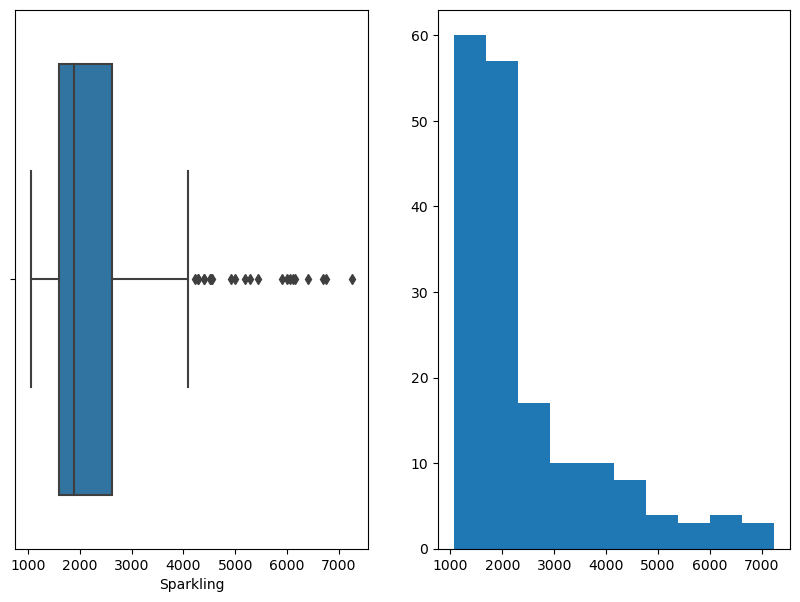

In [14]:
for feature in df.select_dtypes(include='number'):
    print(feature)
    plt.figure(figsize=(10, 7))
    plt.subplot(1,2,1)
    sns.boxplot(x=df[feature])
    plt.subplot(1,2,2)
    plt.hist(x=df[feature])
    
    plt.show()

## Observation
1. Sparkling has extreme values we can see outliers. Its not evenly distributed. Will treat them with box plot technique.

## Outlier treatment

In [15]:
#Boxplot technique to treat outliers
def remove_outliers(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR = Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

lower range 91.125 and upper range 4130.125


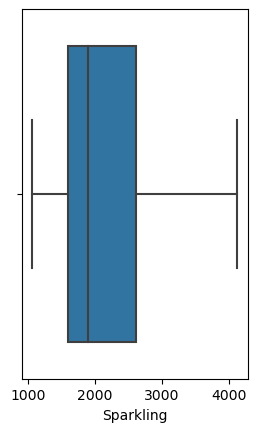

In [16]:
for col in df[1:]:
    lr, ur = remove_outliers(df[col])
    print("lower range",lr, "and upper range", ur)
    df[col] = np.where(df[col]> ur,ur,df[col])
    df[col] = np.where(df[col]<lr,lr,df[col])
    plt.subplot(1,2,1)
    sns.boxplot(x=df[col])
    plt.show()

Outlier datapoints are treated.

## Plot the time series

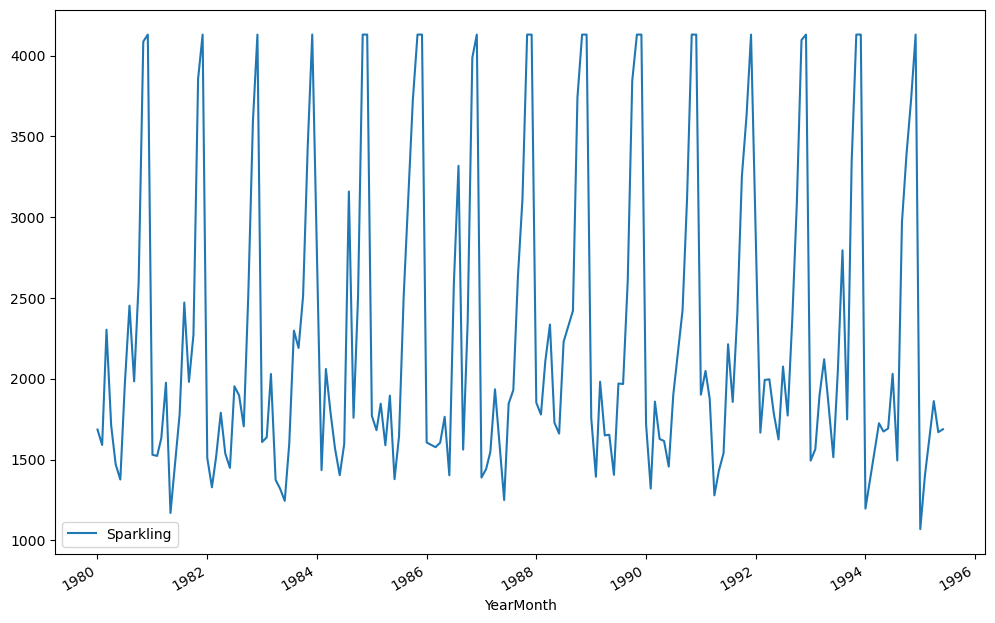

In [17]:
#Increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
df.plot()
plt.show()

We see an stable trend and seasonality which is not constant in nature.

## Additive decomposition

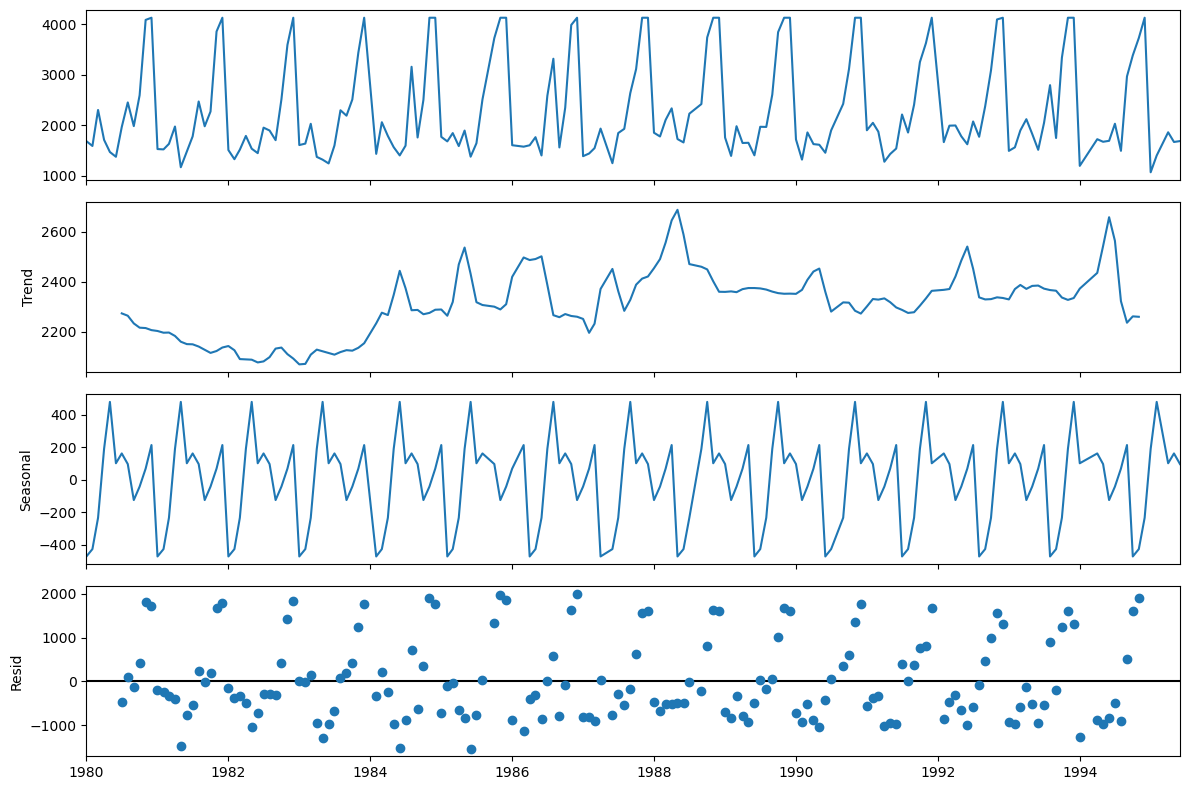

In [18]:
#Decompose the time series additively
df_add_decompose = seasonal_decompose(df, model = 'additive', period = 12)
df_add_decompose.plot()
plt.show()

We see that the residuals are located around 0 from the plot of the residuals in the decomposition.

In [19]:
trend = df_add_decompose.trend
seasonality = df_add_decompose.seasonal
residual = df_add_decompose.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2273.260417
1980-08-01    2263.927083
1980-09-01    2233.135417
1980-10-01    2216.177083
1980-11-01    2214.635417
1980-12-01    2206.385417
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -472.986433
1980-02-01   -427.614409
1980-03-01   -234.927367
1980-04-01    188.979684
1980-05-01    478.117505
1980-06-01    100.544187
1980-07-01    160.966692
1980-08-01     95.600621
1980-09-01   -125.831299
1980-10-01    -43.069766
1980-11-01     67.680234
1980-12-01    212.540353
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    -468.227109
1980-08-01      93.472296
1980-09-01    -123.304118
1980-10-01     422.892683
19

#### 

## Multiplicative decomposition

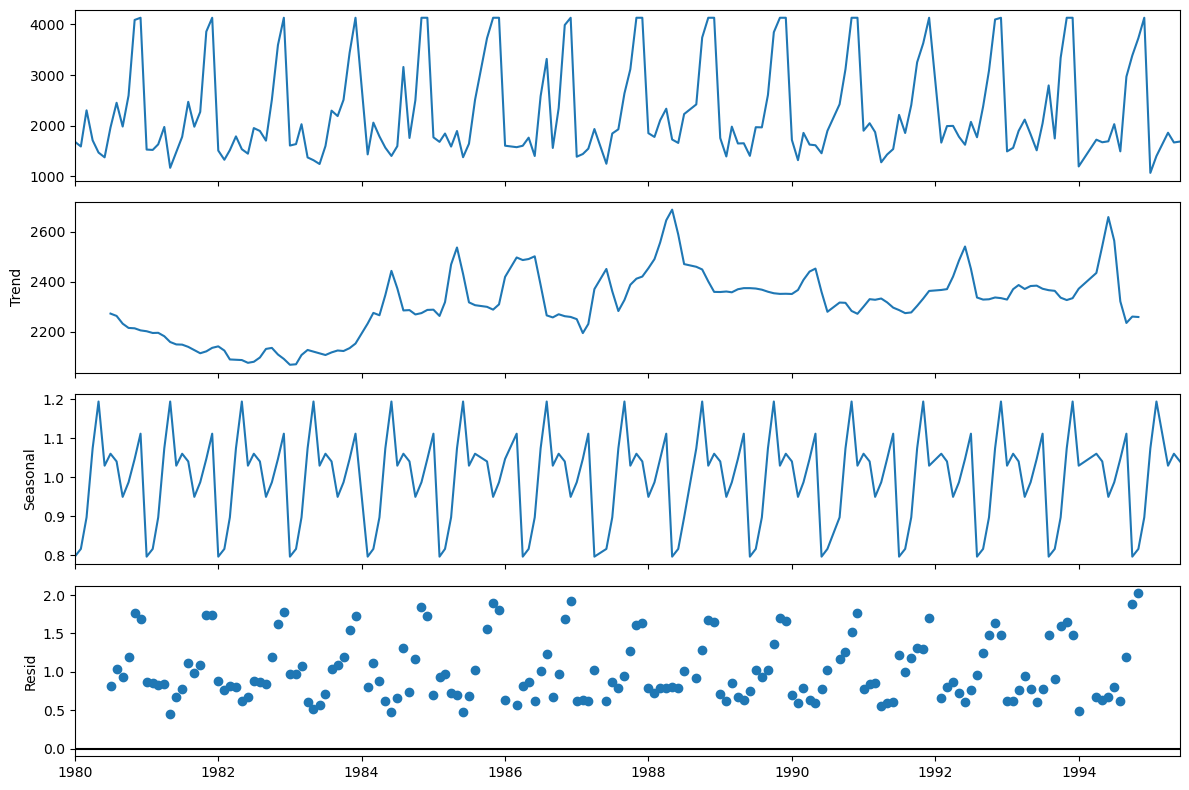

In [20]:
##Decompose the time series multiplicatively
df_mul_decompose = seasonal_decompose(df, model = "multiplicative", period=12)
df_mul_decompose.plot()
plt.show()

For the multiplicative series, we see that a lot of residuals are located around 1. Thus Multiplicative Decomposition is the right way to decompose the time series.

In [21]:
trend = df_mul_decompose.trend
seasonality = df_mul_decompose.seasonal
residual = df_mul_decompose.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2273.260417
1980-08-01    2263.927083
1980-09-01    2233.135417
1980-10-01    2216.177083
1980-11-01    2214.635417
1980-12-01    2206.385417
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.796340
1980-02-01    0.816153
1980-03-01    0.896984
1980-04-01    1.073721
1980-05-01    1.193584
1980-06-01    1.029294
1980-07-01    1.059849
1980-08-01    1.040105
1980-09-01    0.949441
1980-10-01    0.986770
1980-11-01    1.046577
1980-12-01    1.111182
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.816000
1980-08-01    1.041736
1980-09-01    0.935748
1980-10-01    1.187092
1980-11-01    1.763320
1980-12-01    1.684599
Name: resi

In [22]:
#Let's try to do log transformation
df_log = df.copy()
df_log['Sparkling'] = np.log(df)
df_log.Sparkling

YearMonth
1980-01-01    7.430114
1980-02-01    7.372118
1980-03-01    7.742402
1980-04-01    7.445418
1980-05-01    7.293698
                ...   
1995-01-01    6.975414
1995-02-01    7.245655
1995-04-01    7.529406
1995-05-01    7.420579
1995-06-01    7.431300
Name: Sparkling, Length: 176, dtype: float64

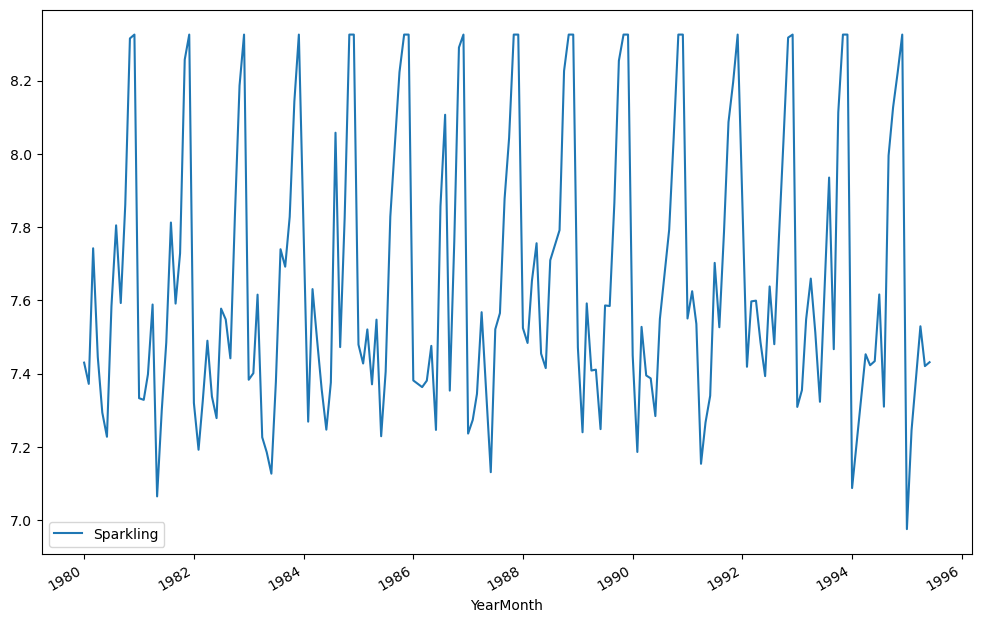

In [23]:
#Visualize the log transformed series
df_log.plot()
plt.show()

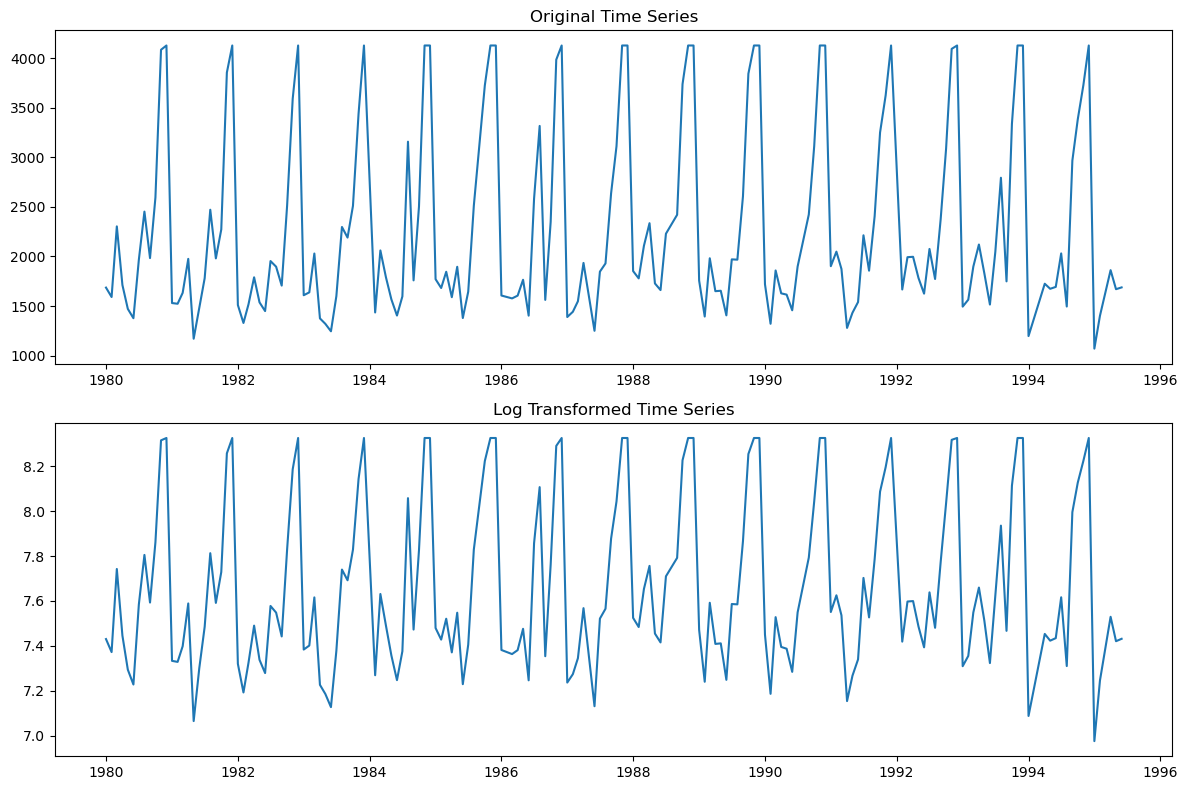

In [24]:
#Compare with the original series
plt.subplot(2,1,1)
plt.title('Original Time Series')
plt.plot(df)

plt.subplot(2,1,2)
plt.title('Log Transformed Time Series')
plt.plot(df_log)
plt.tight_layout()

#### 

## Split the data into train and test and plot the training and test data. [30% of the most recent data will be in the test set]

In [25]:
train    =   df[0:int(len(df)*0.7)] 
test     =   df[int(len(df)*0.7):]

In [26]:
print(train.shape)
print(test.shape)

(123, 1)
(53, 1)


In [27]:
from IPython.display import display
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sparkling
YearMonth,
1980-01-01,1686.0
1980-02-01,1591.0
1980-03-01,2304.0
1980-04-01,1712.0
1980-05-01,1471.0


Last few rows of Training Data


,Sparkling
YearMonth,
1990-04-01,1628.0
1990-05-01,1615.0
1990-06-01,1457.0
1990-07-01,1899.0
1990-09-01,2424.0


First few rows of Test Data


,Sparkling
YearMonth,
1990-10-01,3116.000
1990-11-01,4130.125
1990-12-01,4130.125
1991-01-01,1902.000
1991-02-01,2049.000


Last few rows of Test Data


,Sparkling
YearMonth,
1995-01-01,1070.0
1995-02-01,1402.0
1995-04-01,1862.0
1995-05-01,1670.0
1995-06-01,1688.0


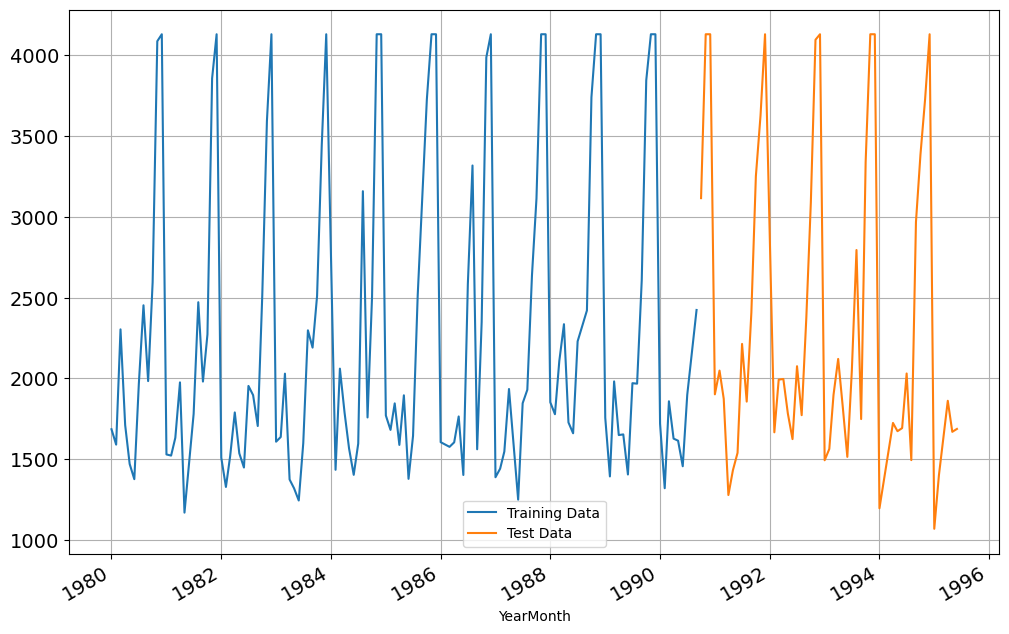

In [28]:
train['Sparkling'].plot(fontsize=14)
test['Sparkling'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## Building different models and comparing the accuracy metrics

### Model 1: Linear Regression

In [29]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+68 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123]
Test Time instance 
 [68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120]


We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [30]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [31]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data')
display(LinearRegression_train.head())
print('Last few rows of Training Data')
display(LinearRegression_train.tail())
print('First few rows of Test Data')
display(LinearRegression_test.head())
print('Last few rows of Test Data')
display(LinearRegression_test.tail())

First few rows of Training Data


,Sparkling,time
YearMonth,,
1980-01-01,1686.0,1
1980-02-01,1591.0,2
1980-03-01,2304.0,3
1980-04-01,1712.0,4
1980-05-01,1471.0,5


Last few rows of Training Data


,Sparkling,time
YearMonth,,
1990-04-01,1628.0,119
1990-05-01,1615.0,120
1990-06-01,1457.0,121
1990-07-01,1899.0,122
1990-09-01,2424.0,123


First few rows of Test Data


,Sparkling,time
YearMonth,,
1990-10-01,3116.000,68
1990-11-01,4130.125,69
1990-12-01,4130.125,70
1991-01-01,1902.000,71
1991-02-01,2049.000,72


Last few rows of Test Data


,Sparkling,time
YearMonth,,
1995-01-01,1070.0,116
1995-02-01,1402.0,117
1995-04-01,1862.0,118
1995-05-01,1670.0,119
1995-06-01,1688.0,120


Our training and test data has been modified, now will use  Linearregressionto build the model on the training data and test the model on the test data.

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr = LinearRegression()

In [34]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'])

LinearRegression()

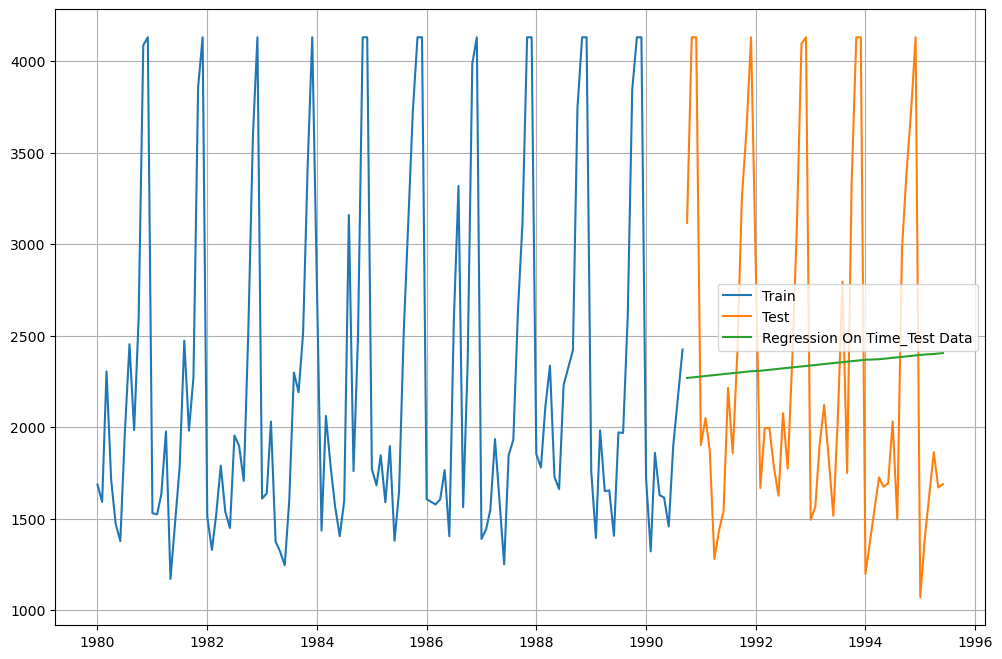

In [35]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

### Defining the functions for calculating the accuracy metrics.

In [36]:
from sklearn import metrics

In [37]:
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 965.463 


In [38]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,965.462857


## Model 2: Naive Approach

In [39]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [40]:
train.tail()

,Sparkling
YearMonth,
1990-04-01,1628.0
1990-05-01,1615.0
1990-06-01,1457.0
1990-07-01,1899.0
1990-09-01,2424.0


In [41]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1990-10-01    2424.0
1990-11-01    2424.0
1990-12-01    2424.0
1991-01-01    2424.0
1991-02-01    2424.0
Name: naive, dtype: float64

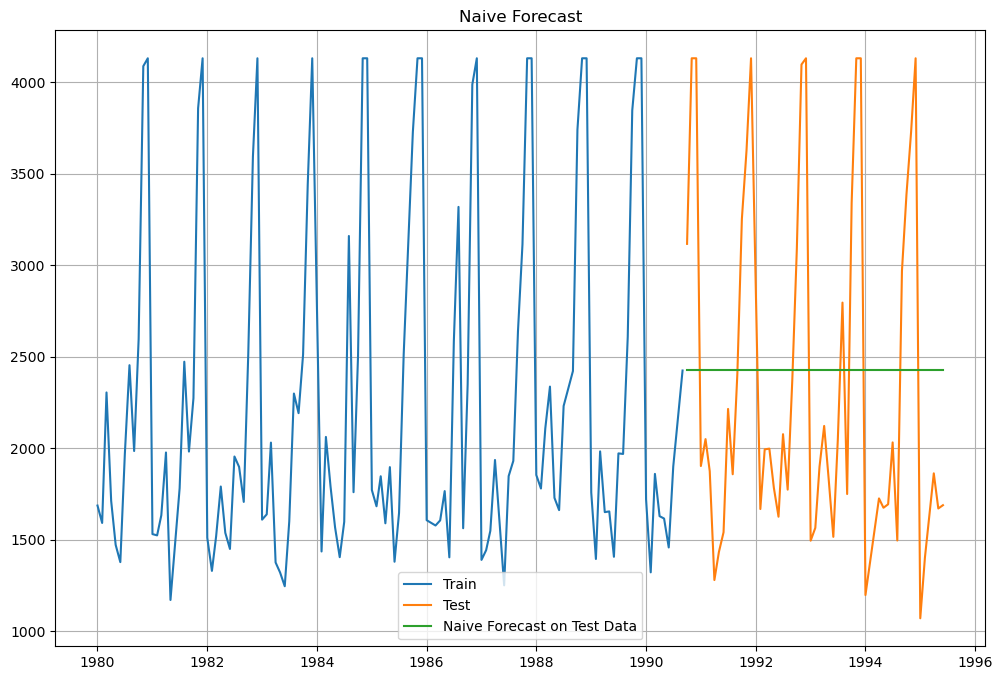

In [42]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

### Model Evaluation

In [43]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 961.301


In [44]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,965.462857
NaiveModel,961.301296


## Method 3: Simple Average

In [45]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [46]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
YearMonth,,
1990-10-01,3116.000,2252.795732
1990-11-01,4130.125,2252.795732
1990-12-01,4130.125,2252.795732
1991-01-01,1902.000,2252.795732
1991-02-01,2049.000,2252.795732


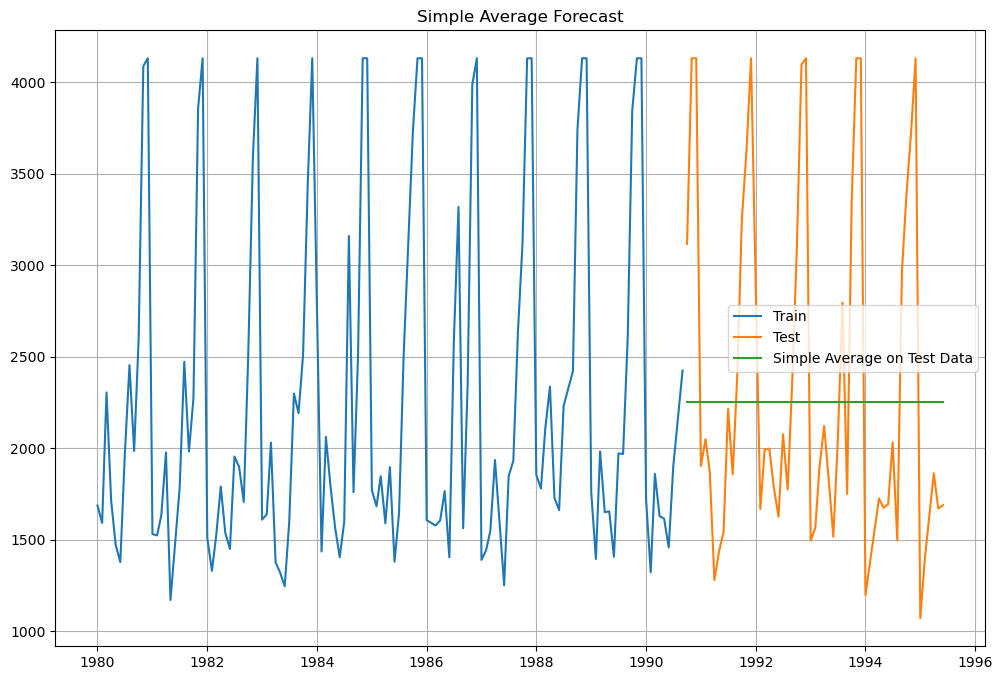

In [47]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

### Model Evaluation

In [48]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 967.811


In [49]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,965.462857
NaiveModel,961.301296
SimpleAverageModel,967.810983


## Method 4: Moving Average(MA)

In [50]:
MovingAverage = df.copy()
MovingAverage.head()

,Sparkling
YearMonth,
1980-01-01,1686.0
1980-02-01,1591.0
1980-03-01,2304.0
1980-04-01,1712.0
1980-05-01,1471.0


In [51]:

MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1980-01-01,1686.0,NaN,NaN,NaN,NaN
1980-02-01,1591.0,1638.5,NaN,NaN,NaN
1980-03-01,2304.0,1947.5,NaN,NaN,NaN
1980-04-01,1712.0,2008.0,1823.25,NaN,NaN
1980-05-01,1471.0,1591.5,1769.50,NaN,NaN


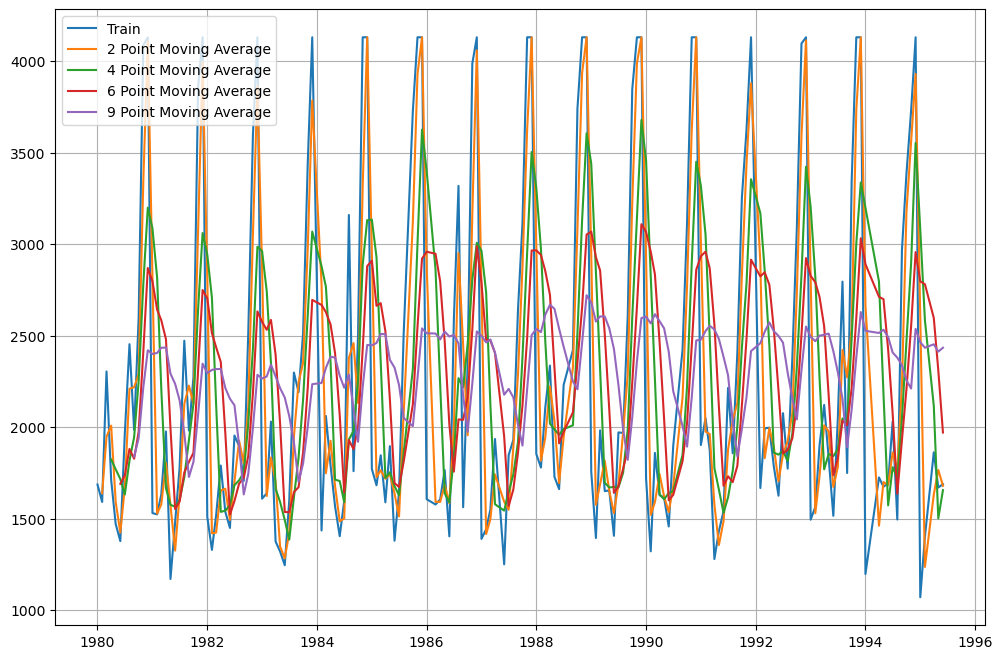

In [52]:
## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [53]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.7)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.7):]

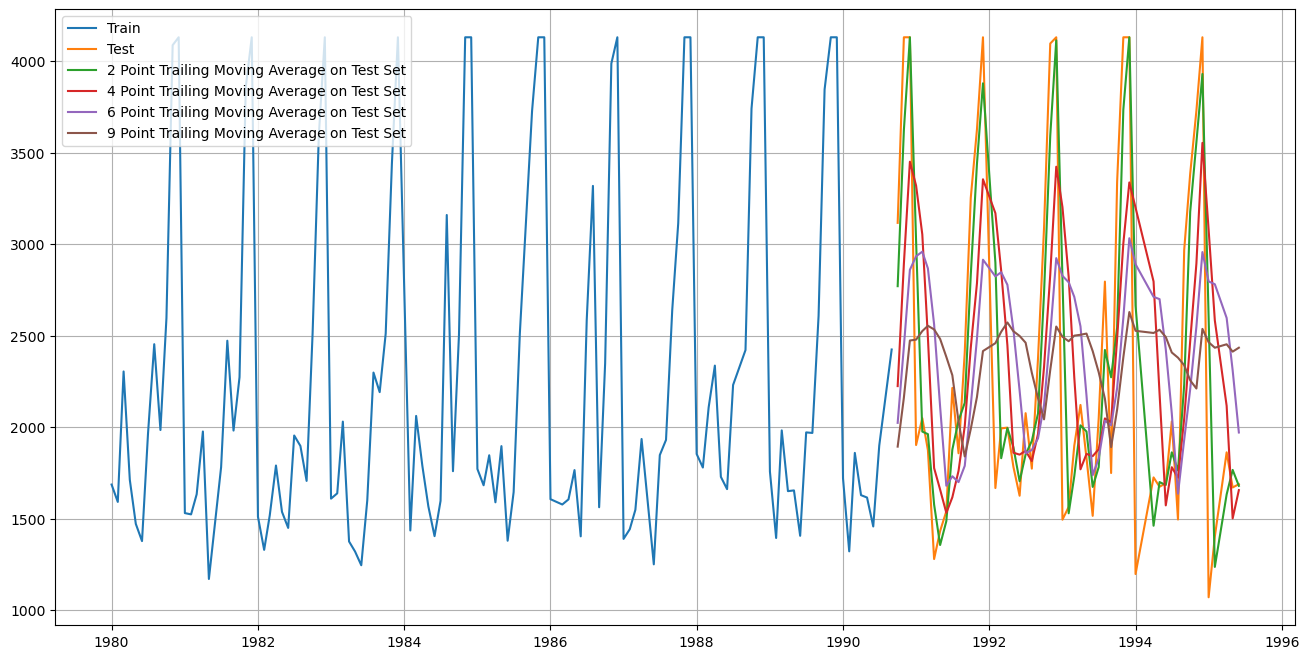

In [54]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')


plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

### Model Evaluation

In [55]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 492.173
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 836.449
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 976.359
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1027.648


In [56]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,965.462857
NaiveModel,961.301296
SimpleAverageModel,967.810983
2pointTrailingMovingAverage,492.172935
4pointTrailingMovingAverage,836.448804
6pointTrailingMovingAverage,976.358671
9pointTrailingMovingAverage,1027.648292


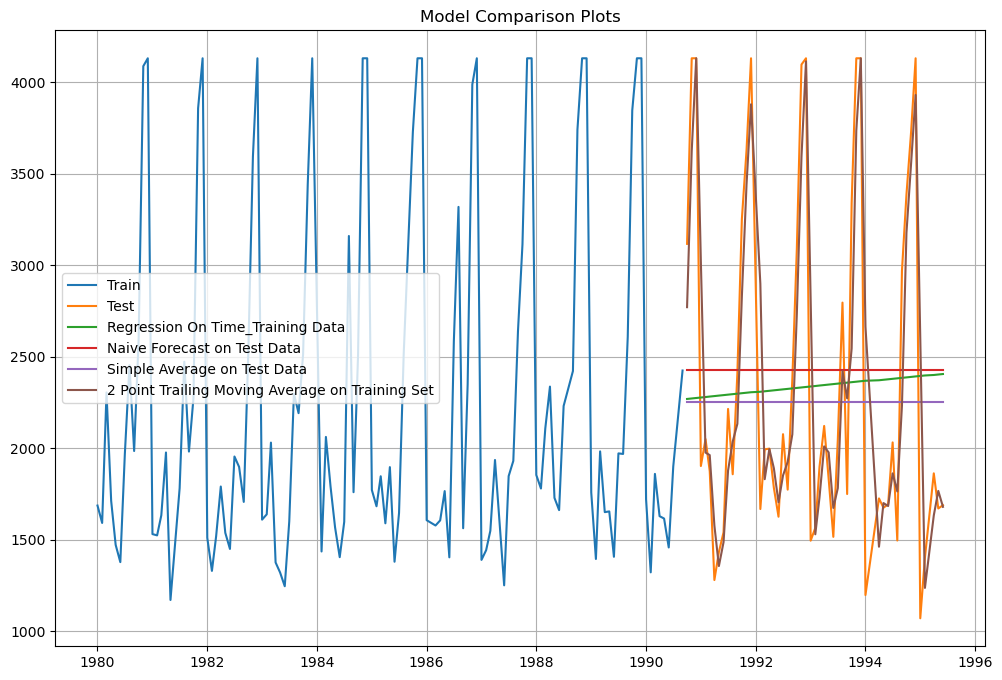

In [57]:
## Plotting on both Training and Test data

plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Training Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

### SES - ETS(A, N, N) - Simple Exponential Smoothing with additive errors

In [58]:
df.head()

,Sparkling
YearMonth,
1980-01-01,1686.0
1980-02-01,1591.0
1980-03-01,2304.0
1980-04-01,1712.0
1980-05-01,1471.0


In [59]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

C:\Users\subra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [60]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

In [61]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.9800654219861422,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1684.3642593666143,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [62]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

C:\Users\subra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\subra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


123    2413.359956
124    2413.359956
125    2413.359956
126    2413.359956
127    2413.359956
128    2413.359956
129    2413.359956
130    2413.359956
131    2413.359956
132    2413.359956
133    2413.359956
134    2413.359956
135    2413.359956
136    2413.359956
137    2413.359956
138    2413.359956
139    2413.359956
140    2413.359956
141    2413.359956
142    2413.359956
143    2413.359956
144    2413.359956
145    2413.359956
146    2413.359956
147    2413.359956
148    2413.359956
149    2413.359956
150    2413.359956
151    2413.359956
152    2413.359956
153    2413.359956
154    2413.359956
155    2413.359956
156    2413.359956
157    2413.359956
158    2413.359956
159    2413.359956
160    2413.359956
161    2413.359956
162    2413.359956
163    2413.359956
164    2413.359956
165    2413.359956
166    2413.359956
167    2413.359956
168    2413.359956
169    2413.359956
170    2413.359956
171    2413.359956
172    2413.359956
173    2413.359956
174    2413.359956
175    2413.

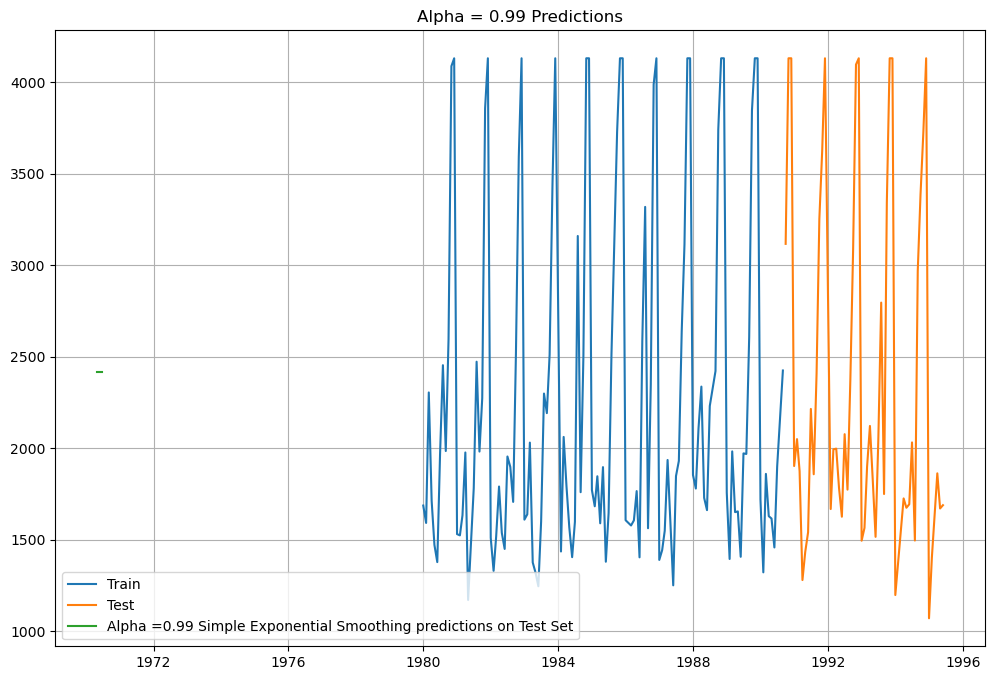

In [63]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [64]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [65]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 960.8185173930749
SES RMSE (calculated using statsmodels): 960.8185173930749


In [66]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.99,SES'])
resultsDf

,Test RMSE
"Alpha=0.99,SES",960.818517


### Double Exponential Smoothing

In [67]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.9922063328296221, 'smoothing_trend': 0.002885262664040741, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.81207985152, 'initial_trend': 28.419235789194836, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\subra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\subra\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [68]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

C:\Users\subra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\subra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


123    2441.957965
124    2463.873724
125    2485.789484
126    2507.705244
127    2529.621004
128    2551.536764
129    2573.452523
130    2595.368283
131    2617.284043
132    2639.199803
133    2661.115563
134    2683.031322
135    2704.947082
136    2726.862842
137    2748.778602
138    2770.694362
139    2792.610121
140    2814.525881
141    2836.441641
142    2858.357401
143    2880.273161
144    2902.188920
145    2924.104680
146    2946.020440
147    2967.936200
148    2989.851959
149    3011.767719
150    3033.683479
151    3055.599239
152    3077.514999
153    3099.430758
154    3121.346518
155    3143.262278
156    3165.178038
157    3187.093798
158    3209.009557
159    3230.925317
160    3252.841077
161    3274.756837
162    3296.672597
163    3318.588356
164    3340.504116
165    3362.419876
166    3384.335636
167    3406.251396
168    3428.167155
169    3450.082915
170    3471.998675
171    3493.914435
172    3515.830194
173    3537.745954
174    3559.661714
175    3581.

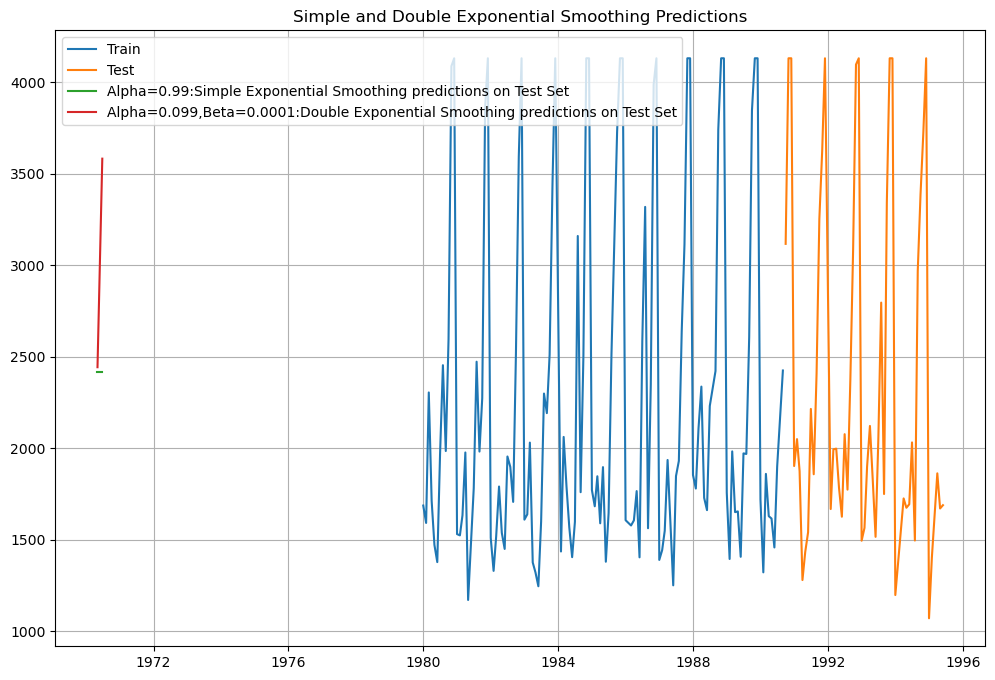

In [69]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [70]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 1225.0669880166895


In [71]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",960.818517
"Alpha=1,Beta=0.0189:DES",1225.066988


### Inference
Here, we see that the Simple Exponential Smoothing is doing well. 

### Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [72]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',initialization_method='estimated', seasonal='additive',seasonal_periods=12)
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.04057538855658975, 'smoothing_trend': 0.04056803977276431, 'smoothing_seasonal': 0.8221954874620271, 'damping_trend': nan, 'initial_level': 2269.281645590018, 'initial_trend': -0.3977441060361335, 'initial_seasons': array([-626.81430882, -515.43183737, -408.40024034, -495.61034066,
       -831.27199858, -722.27734338, -313.52231376,  138.99612381,
       -175.16513574,  339.76582178, 1612.92780874, 1996.94913203]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\subra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [73]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

C:\Users\subra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\subra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


123    2589.007007
124    3809.432215
125    4088.831730
126    4101.006156
127    1771.924366
128    1358.046376
129    1885.696658
130    1656.648379
131    1657.576718
132    1485.200805
133    1930.062781
134    2034.127556
135    2599.978619
136    3820.403827
137    4099.803342
138    4111.977768
139    1782.895977
140    1369.017988
141    1896.668270
142    1667.619991
143    1668.548330
144    1496.172417
145    1941.034393
146    2045.099168
147    2610.950230
148    3831.375439
149    4110.774954
150    4122.949380
151    1793.867589
152    1379.989600
153    1907.639881
154    1678.591602
155    1679.519941
156    1507.144029
157    1952.006005
158    2056.070780
159    2621.921842
160    3842.347051
161    4121.746566
162    4133.920991
163    1804.839201
164    1390.961211
165    1918.611493
166    1689.563214
167    1690.491553
168    1518.115640
169    1962.977617
170    2067.042392
171    2632.893454
172    3853.318663
173    4132.718178
174    4144.892603
175    1815.

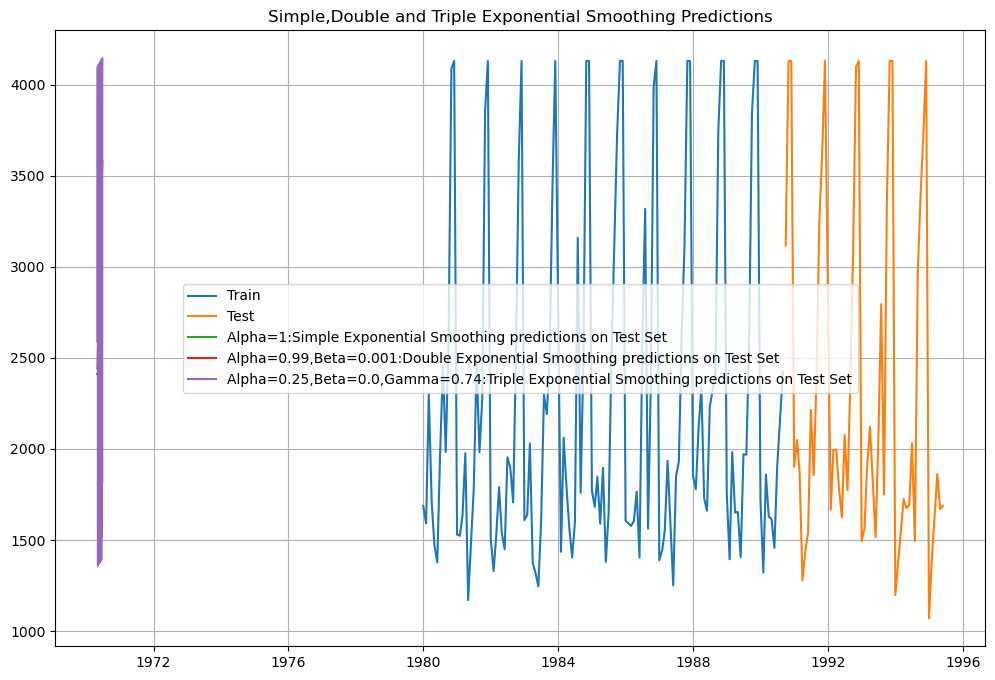

In [74]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [75]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 1258.6596616410052


In [76]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",960.818517
"Alpha=1,Beta=0.0189:DES",1225.066988
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",1258.659662


## Holt-Winters - ETS(A, A, M) - Holt Winter's linear method

In [77]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated',seasonal_periods=12)
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.00500003285751042, 'smoothing_trend': 0.0050000323570071475, 'smoothing_seasonal': 0.9239285503154906, 'damping_trend': nan, 'initial_level': 2269.1356303857365, 'initial_trend': -9.154186709266275, 'initial_seasons': array([0.73770583, 0.77956235, 1.00782497, 0.77558982, 0.64904853,
       0.68133872, 0.88373077, 1.1146795 , 0.9206523 , 1.18112914,
       1.87327337, 1.93858795]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\subra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [78]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

C:\Users\subra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\subra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


123    2392.720156
124    3531.793139
125    3796.153741
126    3796.285075
127    1592.985314
128    1220.497531
129    1713.047645
130    1496.282628
131    1485.266805
132    1332.408421
133    1740.176122
134    1681.759681
135    2194.666796
136    3237.424453
137    3477.538064
138    3475.414118
139    1457.387355
140    1115.864229
141    1565.131262
142    1366.146834
143    1355.146008
144    1214.820729
145    1585.464317
146    1531.125416
147    1996.613437
148    2943.055767
149    3158.922386
150    3154.543161
151    1321.789396
152    1011.230928
153    1417.214880
154    1236.011041
155    1225.025210
156    1097.233036
157    1430.752512
158    1380.491151
159    1798.560077
160    2648.687081
161    2840.306709
162    2833.672204
163    1186.191437
164     906.597626
165    1269.298498
166    1105.875247
167    1094.904413
168     979.645343
169    1276.040707
170    1229.856886
171    1600.506718
172    2354.318394
173    2521.691032
174    2512.801248
175    1050.

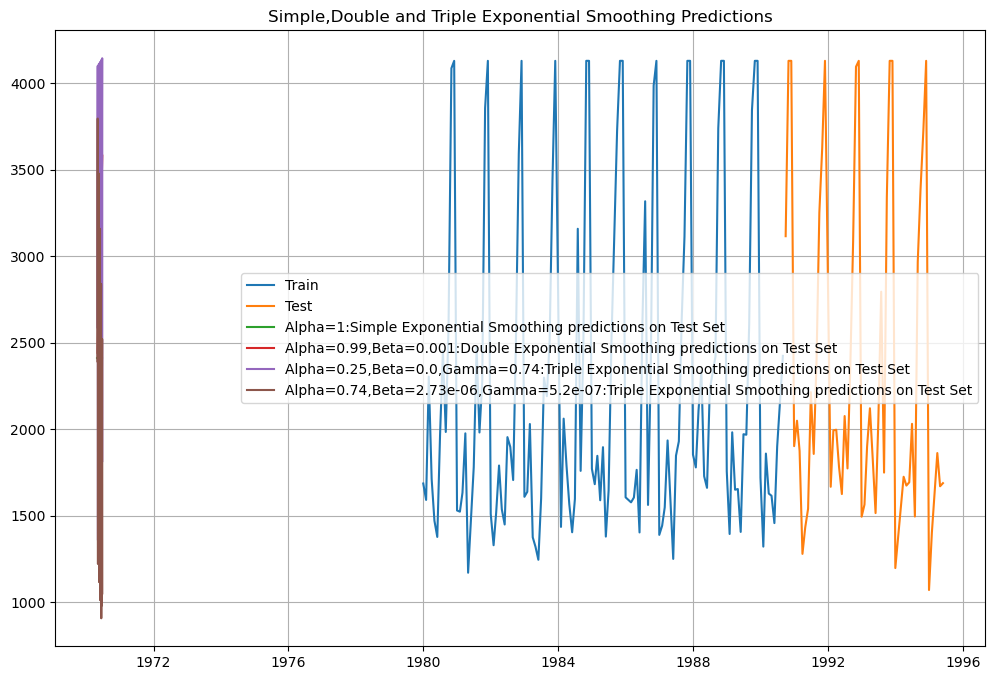

In [79]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_am, label='Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [80]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 1203.722393013261


In [81]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",960.818517
"Alpha=1,Beta=0.0189:DES",1225.066988
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",1258.659662
"Alpha=0.74,Beta=2.73e-06,Gamma=5.2e-07,Gamma=0:TES",1203.722393


We see that the multiplicative seasonality model has done well when compared to the additive seasonality Triple Exponential Smoothing model.
But still single soothing model is  better.

## Check for Stationarity

In [82]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df)#python implementation of dicky fuller test 
dftest
print('DF statistic is %3.3f' %dftest[0])
print('DF p-value is %1.4f' %dftest[1])

DF statistic is -2.859
DF p-value is 0.0503


The p-value 0.0503 is very large, and not smaller than 0.05 and thus is not a stationary series. 

Let us take a difference of order 1 and check whether the Time Series is stationary or not.

In [83]:
# Seasonal differencing (assuming monthly data with yearly seasonality)
df = df.diff(periods=12).dropna()

# ADF test for seasonal differencing
(df, "Seasonally Differenced Time Series")


(            Sparkling
 YearMonth            
 1981-01-01   -156.000
 1981-02-01    -68.000
 1981-03-01   -671.000
 1981-04-01    264.000
 1981-05-01   -301.000
 ...               ...
 1995-01-01  -3060.125
 1995-02-01  -2728.125
 1995-04-01    665.000
 1995-05-01    -55.000
 1995-06-01     14.000
 
 [164 rows x 1 columns],
 'Seasonally Differenced Time Series')

In [84]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df)#python implementation of dicky fuller test 
dftest
print('DF statistic is %3.3f' %dftest[0])
print('DF p-value is %1.4f' %dftest[1])

DF statistic is -4.472
DF p-value is 0.0002


### Plot the Autocorrelation function plots on the whole data.

In [85]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

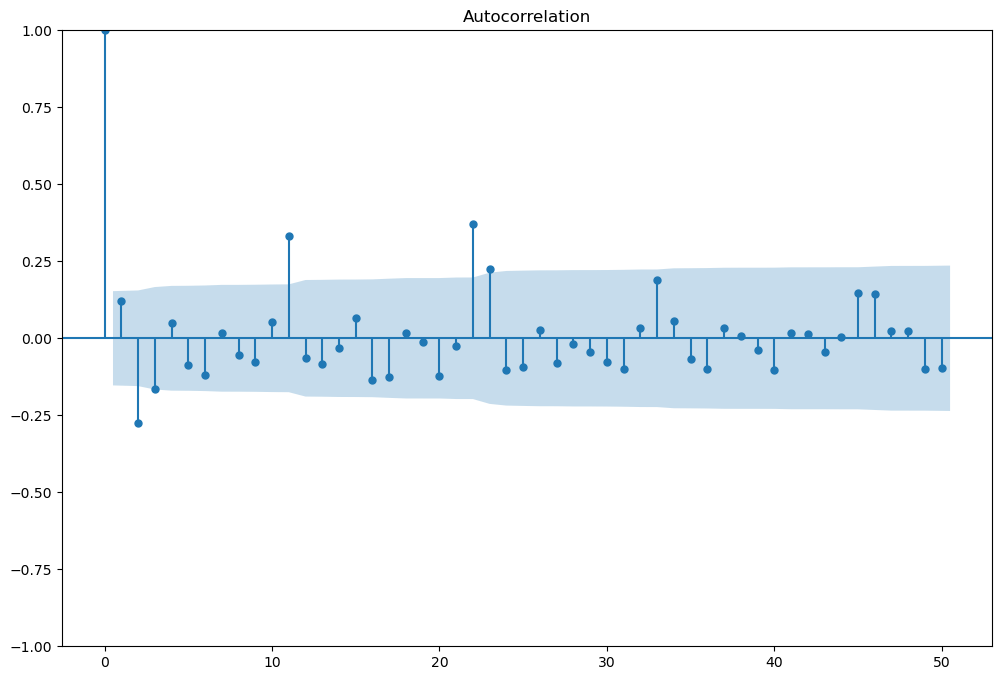

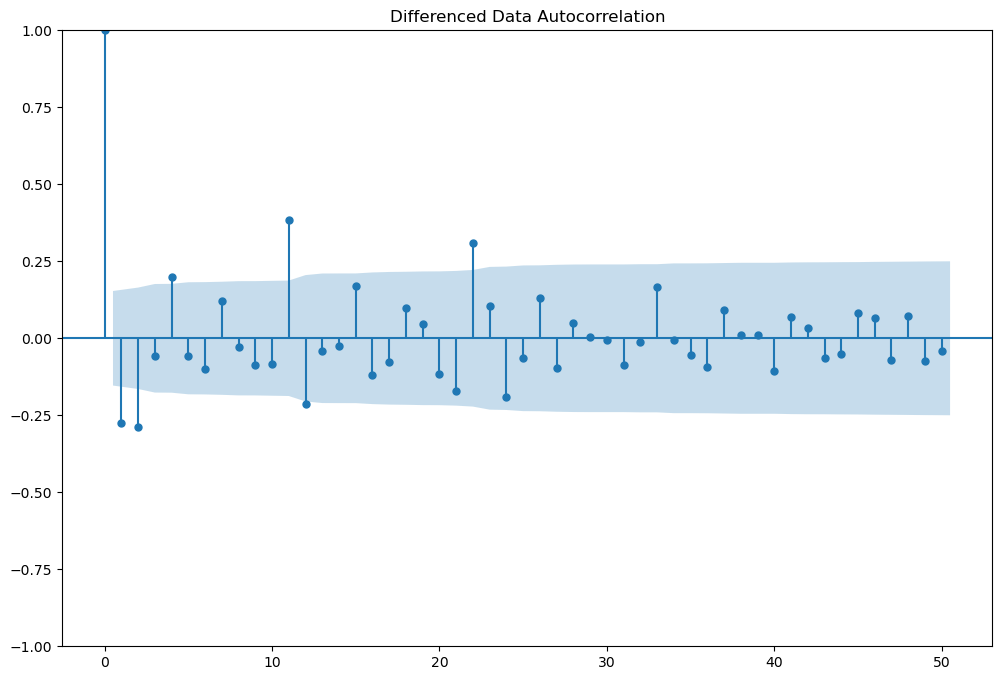

In [86]:
plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [87]:
print(train.shape)
print(test.shape)

(123, 1)
(53, 1)


In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 1980-01-01 to 1990-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sparkling  123 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


#### Build an Automated version of an ARMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC

In [89]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 0 as we necessary for an ARMA model 

import itertools
p = q = range(0, 3)
d= range(1)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)


In [90]:
# Creating an empty Dataframe with column names only
ARMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARMA_AIC

,param,AIC


In [91]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARMA_model.aic))
    ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)

ARIMA(0, 0, 0) - AIC:2035.531039093101
ARIMA(0, 0, 1) - AIC:1993.679799162194
ARIMA(0, 0, 2) - AIC:1990.9954469707427
ARIMA(1, 0, 0) - AIC:2001.9232365174507
ARIMA(1, 0, 1) - AIC:1993.104945127603


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\159358060.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\159358060.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\159358060.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\159358060.py:6: FutureWarning: The frame.append method is deprecated and will be removed 

ARIMA(1, 0, 2) - AIC:1990.5489444306418
ARIMA(2, 0, 0) - AIC:1990.569914712711
ARIMA(2, 0, 1) - AIC:1992.4666592558501


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\159358060.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\159358060.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\159358060.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)
C:\Users\subra\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive p

ARIMA(2, 0, 2) - AIC:1990.5333662721202


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\159358060.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARMA_AIC = ARMA_AIC.append({'param':param, 'AIC': ARMA_model.aic}, ignore_index=True)


In [92]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 0, 2)",1990.533366
5,"(1, 0, 2)",1990.548944
6,"(2, 0, 0)",1990.569915
2,"(0, 0, 2)",1990.995447
7,"(2, 0, 1)",1992.466659
4,"(1, 0, 1)",1993.104945
1,"(0, 0, 1)",1993.679799
3,"(1, 0, 0)",2001.923237
0,"(0, 0, 0)",2035.531039


In [93]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,0,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\subra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\subra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\subra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\subra\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  123
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -989.267
Date:                Fri, 11 Oct 2024   AIC                           1990.533
Time:                        15:00:36   BIC                           2007.406
Sample:                             0   HQIC                          1997.387
                                - 123                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2253.1245    145.215     15.516      0.000    1968.508    2537.741
ar.L1         -0.3747      0.243     -1.541      0.123      -0.851       0.102
ar.L2         -0.1953      0.160     -1.220      0.2

### Predict on the Test Set using this model and evaluate the model.

In [94]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

C:\Users\subra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\subra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [95]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
print(rmse)

964.4894493073946


In [96]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,0,2)'])

resultsDf

### Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

,RMSE
"ARIMA(2,0,2)",964.489449


In [97]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [98]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [99]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2017.0523216839852
ARIMA(0, 1, 1) - AIC:2019.0612269350008
ARIMA(0, 1, 2) - AIC:1983.7121211327226
ARIMA(1, 1, 0) - AIC:2019.046486212409


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3609794300.py:6: FutureWarning: The frame.append method is deprecated and wil

ARIMA(1, 1, 1) - AIC:1990.7824350842122
ARIMA(1, 1, 2) - AIC:1982.5251053318698
ARIMA(2, 1, 0) - AIC:2006.726678564717


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(2, 1, 1) - AIC:1980.4404904908217
ARIMA(2, 1, 2) - AIC:1982.2945024685653


C:\Users\subra\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3609794300.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


In [100]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
7,"(2, 1, 1)",1980.440490
8,"(2, 1, 2)",1982.294502
5,"(1, 1, 2)",1982.525105
2,"(0, 1, 2)",1983.712121
4,"(1, 1, 1)",1990.782435
6,"(2, 1, 0)",2006.726679
0,"(0, 1, 0)",2017.052322
3,"(1, 1, 0)",2019.046486
1,"(0, 1, 1)",2019.061227


In [101]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,1))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\subra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\subra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\subra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  123
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -986.220
Date:                Fri, 11 Oct 2024   AIC                           1980.440
Time:                        15:00:37   BIC                           1991.657
Sample:                             0   HQIC                          1984.996
                                - 123                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6690      0.085      7.905      0.000       0.503       0.835
ar.L2         -0.3095      0.106     -2.917      0.004      -0.517      -0.102
ma.L1         -1.0000      0.166     -6.018      0.0

## Predict on the Test Set using this model and evaluate the model.

In [102]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

C:\Users\subra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\subra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [103]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
print(rmse)

962.0239457217747


In [104]:
temp_resultsDf0 = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(2,1,1)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf0])
resultsDf

,RMSE
"ARIMA(2,0,2)",964.489449
"ARIMA(2,1,1)",962.023946


### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [105]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

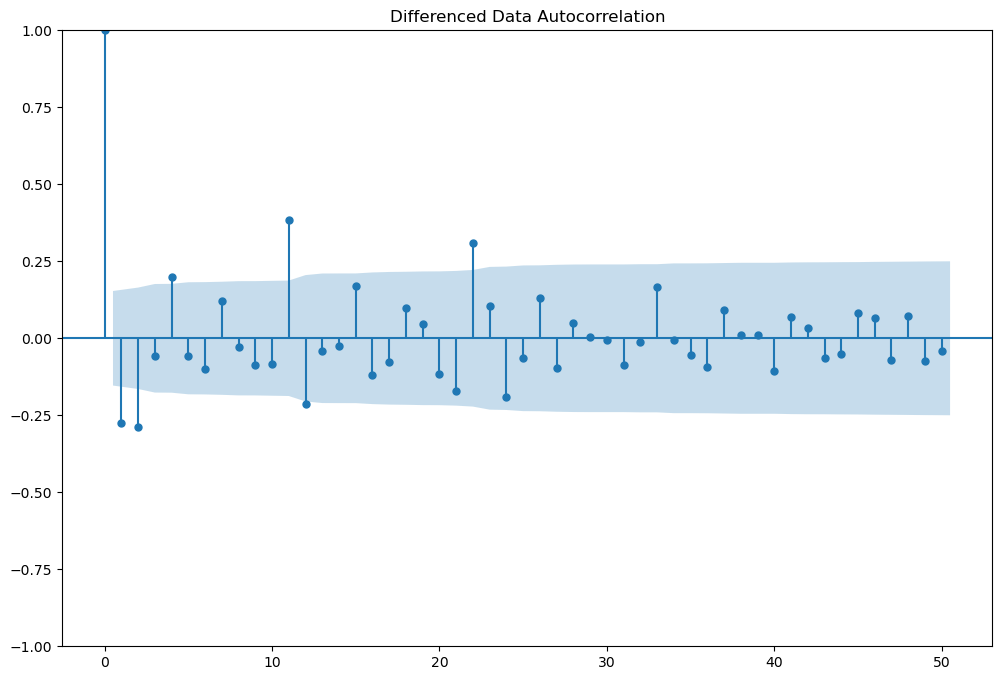

In [106]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

In [107]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


#### SARIMA Model building to estimate best parameters 

In [108]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [109]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2001.517090382697
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:1903.4374202330423
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1785.9737435618254
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:1914.7306980851563


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Te

SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:1891.7563501948873
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1787.885938365822
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1798.1756022084637


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1800.041165649395


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1786.5244573641241
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:1987.408285595319
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:1889.607602726077


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1744.4849937309768
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:1899.111572024022


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:1844.6642009041595


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1736.0261236476288


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1761.0582935271104


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1763.0573716013844


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1730.0709998352977
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AIC:1934.9439418096108


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 1, 6) - AIC:1835.345317070838


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 2, 6) - AIC:1718.197869214687
SARIMA(0, 1, 2)x(1, 0, 0, 6) - AIC:1874.1275377338704


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 1, 6) - AIC:1812.9385987342157


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 2, 6) - AIC:1712.390780058142


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 0, 6) - AIC:1753.1692680313067


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 1, 6) - AIC:1755.1040822766638


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 2, 6) - AIC:1709.8964199870968
SARIMA(1, 1, 0)x(0, 0, 0, 6) - AIC:2003.5123921426016
SARIMA(1, 1, 0)x(0, 0, 1, 6) - AIC:1905.3479396362768
SARIMA(1, 1, 0)x(0, 0, 2, 6) - AIC:1784.592196316549


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Te

SARIMA(1, 1, 0)x(1, 0, 0, 6) - AIC:1901.0023731221127
SARIMA(1, 1, 0)x(1, 0, 1, 6) - AIC:1892.2795540013083


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 2, 6) - AIC:1786.5176123642439
SARIMA(1, 1, 0)x(2, 0, 0, 6) - AIC:1781.6834202443717


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 1, 6) - AIC:1783.3939062669972


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 2, 6) - AIC:1784.7491605882744
SARIMA(1, 1, 1)x(0, 0, 0, 6) - AIC:1963.130395623827
SARIMA(1, 1, 1)x(0, 0, 1, 6) - AIC:1865.0037483116676


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 2, 6) - AIC:1736.2171362707363
SARIMA(1, 1, 1)x(1, 0, 0, 6) - AIC:1866.2504145094642


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 1, 6) - AIC:1835.970693210523


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 2, 6) - AIC:1732.8010301473234


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 0, 6) - AIC:1740.6367350409857


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 1, 6) - AIC:1742.6089733187696


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 2, 6) - AIC:1728.8020933770429
SARIMA(1, 1, 2)x(0, 0, 0, 6) - AIC:1939.1953559355804


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 1, 6) - AIC:1835.9239999741644


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 2, 6) - AIC:1719.9937654352038
SARIMA(1, 1, 2)x(1, 0, 0, 6) - AIC:1858.95996906887


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 1, 6) - AIC:1814.934268874262


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 2, 6) - AIC:1714.2489298978765


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 0, 6) - AIC:1738.0435758907793


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 1, 6) - AIC:1740.040239502242


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 2, 6) - AIC:1711.5403123023364
SARIMA(2, 1, 0)x(0, 0, 0, 6) - AIC:1974.5818711477168
SARIMA(2, 1, 0)x(0, 0, 1, 6) - AIC:1892.8217593086488


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 2, 6) - AIC:1779.7822257006767
SARIMA(2, 1, 0)x(1, 0, 0, 6) - AIC:1873.1449327319228


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 1, 6) - AIC:1862.8387717336434


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 2, 6) - AIC:1777.0877525212395
SARIMA(2, 1, 0)x(2, 0, 0, 6) - AIC:1753.7916888340496


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 1, 6) - AIC:1755.6437448016372


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 2, 6) - AIC:1757.2078823246525
SARIMA(2, 1, 1)x(0, 0, 0, 6) - AIC:1951.5959272435764


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 1, 6) - AIC:1846.4889597967224


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 2, 6) - AIC:1732.3773123059727


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 0, 6) - AIC:1834.1999968154175


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 1, 6) - AIC:1820.4961736008095


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 2, 6) - AIC:1720.3220543433554


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 0, 6) - AIC:1715.229791349175


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 1, 6) - AIC:1717.2162499024676


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 2, 6) - AIC:1719.1355243152645


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 0, 6) - AIC:1921.7773498678632


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 1, 6) - AIC:1823.8682374527332


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 2, 6) - AIC:1712.7701033161372


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 0, 6) - AIC:1829.0826151496078


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 1, 6) - AIC:1801.509017039756


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 2, 6) - AIC:1704.0801220391058


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 0, 6) - AIC:1715.0963649262226


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 1, 6) - AIC:1717.0861966269324


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 2, 6) - AIC:1704.127493312594


C:\Users\subra\AppData\Local\Temp\ipykernel_51056\3271564440.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [110]:
SARIMA_AIC.sort_values(by=['AIC'],ascending=True).head()

,param,seasonal,AIC
77,"(2, 1, 2)","(1, 0, 2, 6)",1704.080122
80,"(2, 1, 2)","(2, 0, 2, 6)",1704.127493
26,"(0, 1, 2)","(2, 0, 2, 6)",1709.896420
53,"(1, 1, 2)","(2, 0, 2, 6)",1711.540312
23,"(0, 1, 2)","(1, 0, 2, 6)",1712.390780


In [111]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(2, 1, 2),
                                seasonal_order=(1, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  123
Model:             SARIMAX(2, 1, 2)x(1, 0, 2, 6)   Log Likelihood                -844.040
Date:                           Fri, 11 Oct 2024   AIC                           1704.080
Time:                                   15:01:00   BIC                           1725.463
Sample:                                        0   HQIC                          1712.748
                                           - 123                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6839      0.176      3.882      0.000       0.339       1.029
ar.L2         -0.4853      0.106     -4.587

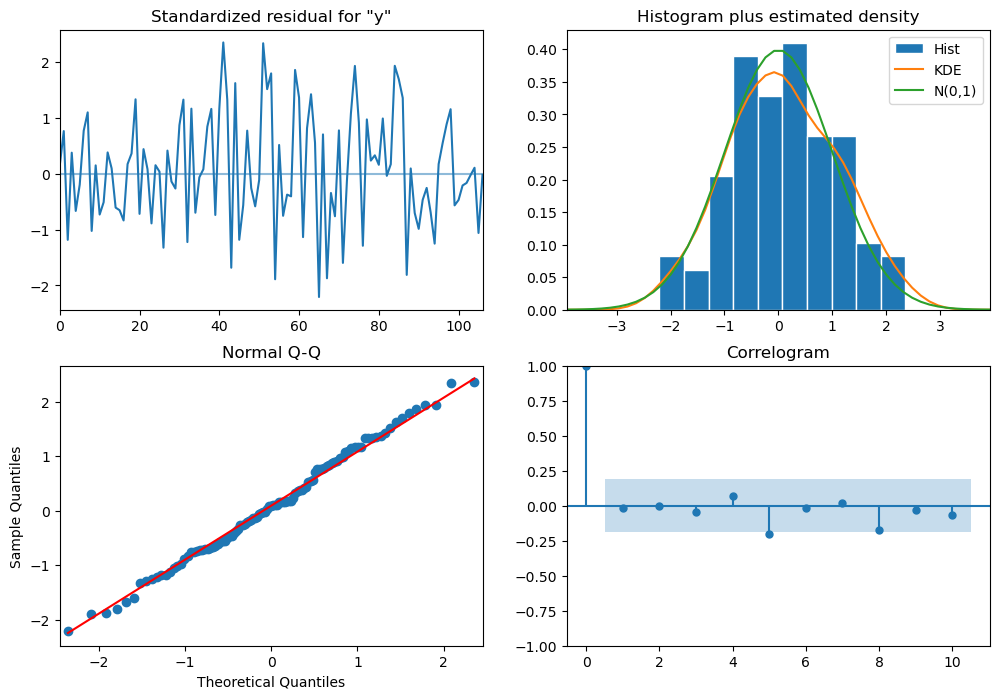

In [112]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [113]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [114]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,2818.398959,640.592773,1562.860194,4073.937723
1,3441.351465,661.289202,2145.248446,4737.454483
2,3387.966692,685.242257,2044.916547,4731.016837
3,3304.075782,709.375466,1913.725418,4694.426146
4,2259.635857,709.637445,868.772022,3650.499692


In [115]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

866.9206521991215


In [116]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(2,1,2)(1, 0, 2, 6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(2,0,2)",964.489449
"ARIMA(2,1,1)",962.023946
"SARIMA(2,1,2)(1, 0, 2, 6)",866.920652


### Building the most optimum model on the Full Data.

In [117]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(2,1,2),
                                seasonal_order=(1, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Users\subra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\subra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  164
Model:             SARIMAX(2, 1, 2)x(1, 0, 2, 6)   Log Likelihood               -1187.348
Date:                           Fri, 11 Oct 2024   AIC                           2390.696
Time:                                   15:01:02   BIC                           2414.673
Sample:                                        0   HQIC                          2400.438
                                           - 164                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8016      0.134      5.997      0.000       0.540       1.064
ar.L2         -0.4701      0.072     -6.523

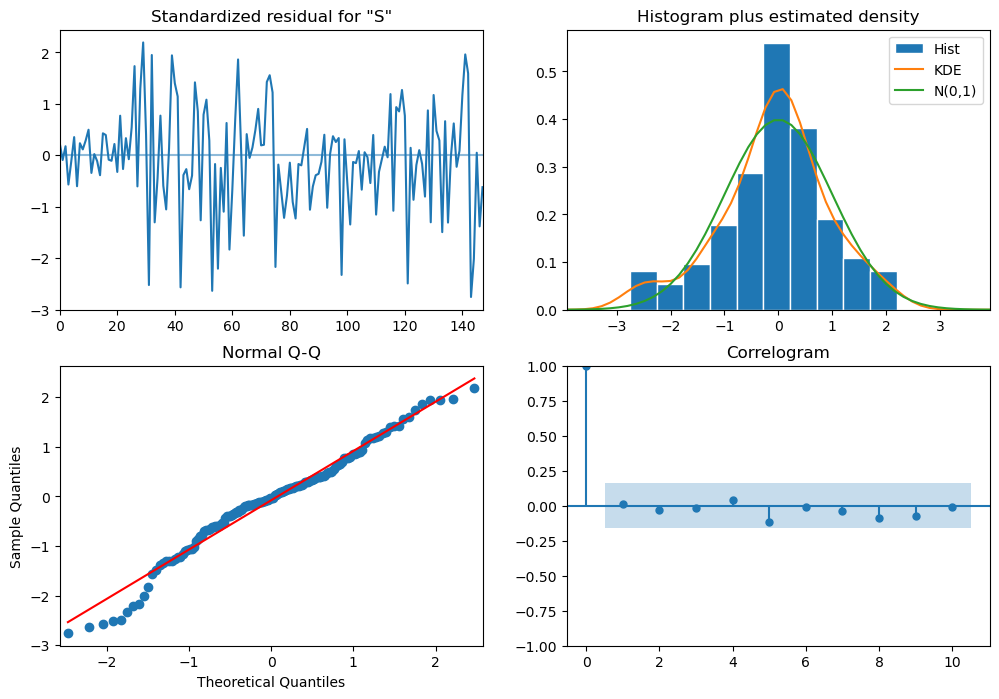

In [118]:
results_full_data_model.plot_diagnostics();

### Evaluate the model on the whole and predict 12 months into the future

In [119]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

C:\Users\subra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\subra\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [120]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
164,-156.389616,710.551684,-1549.045326,1236.266094
165,868.039002,721.039446,-545.172344,2281.250347
166,969.098139,753.922280,-508.562378,2446.758656
167,-24.150289,784.811021,-1562.351625,1514.051048
168,-454.313371,786.742409,-1996.300157,1087.673415


In [121]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 707.1607162688947


In [122]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05)

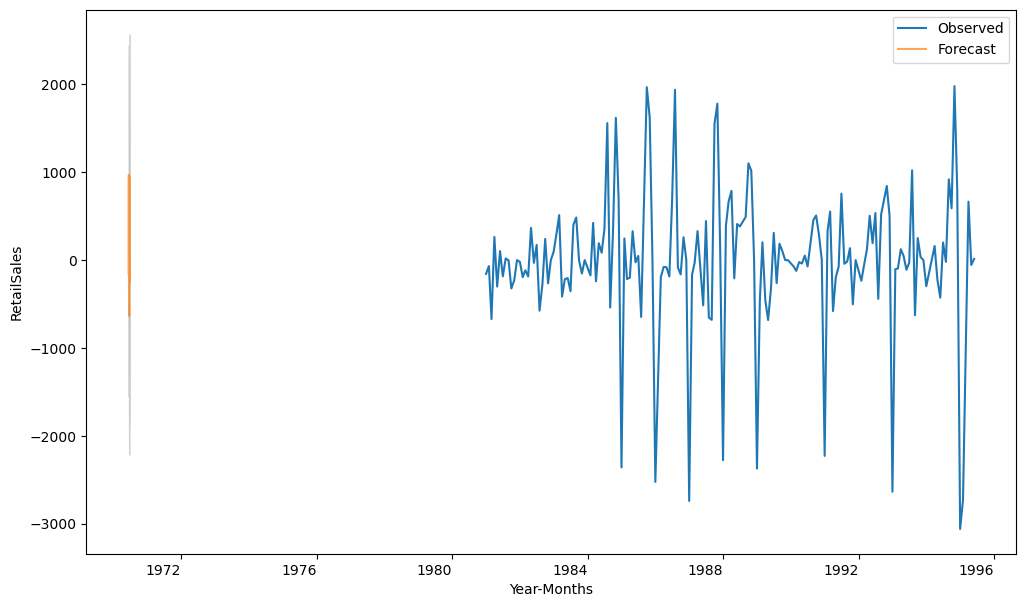

In [123]:
# plot the forecast along with the confidence band

axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('RetailSales')
plt.legend(loc='best')
plt.show()